## Travaux pratique 1


### Exercice 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

1. Chargeons le dataset avec pandas.

In [4]:
salaries_ds = pd.read_csv('./data/exercice_1/salaries.csv')

2. Affichez le nombre de lignes et de colonnes.

In [5]:
print(f"Nombre de lignes: {salaries_ds.shape[0]}\nNombre de colonnes: {salaries_ds.shape[1]}")

Nombre de lignes: 88584
Nombre de colonnes: 11


3. Affichez un échantillon de 10 lignes du dataset.

In [6]:
print(salaries_ds.sample(10))

       work_year experience_level employment_type          job_title  \
58751     2024.0               SE              FT       Data Analyst   
20094     2024.0               EN              FT           Engineer   
42276     2024.0               MI              FT           Engineer   
32948     2024.0               MI              FT           Engineer   
86121     2023.0               SE              FT      Data Engineer   
66809     2024.0               MI              FT     Data Scientist   
80673     2023.0               SE              FT      Data Engineer   
12711     2025.0               SE              FT      Data Engineer   
4146      2025.0               SE              FT  Software Engineer   
19163     2024.0               SE              FT            Manager   

         salary salary_currency  salary_in_usd employee_residence  \
58751  139650.0             USD       139650.0                 US   
20094  250600.0             USD       250600.0                 US   


4. Listez les noms des colonnes et leurs types de données.

In [7]:
print(salaries_ds.dtypes)

work_year             float64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio          float64
company_location       object
company_size           object
dtype: object


5. Affichez un résumé statistique des colonnes numériques.

In [8]:
print(salaries_ds.describe())

          work_year        salary  salary_in_usd  remote_ratio
count  88583.000000  8.858200e+04   88576.000000  88582.000000
mean    2024.034747  1.619328e+05  157567.123453     21.285363
std        0.620365  1.965339e+05   73528.449424     40.830559
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2024.000000  1.060000e+05  106100.000000      0.000000
50%     2024.000000  1.470000e+05  146307.000000      0.000000
75%     2024.000000  1.995000e+05  198600.000000      0.000000
max     2025.000000  3.040000e+07  800000.000000    100.000000


6. Identifiez les colonnes qui contiennent des valeurs manquantes.


In [9]:
print(salaries_ds.isnull().sum())

work_year              1
experience_level       1
employment_type        3
job_title             10
salary                 2
salary_currency        1
salary_in_usd          8
employee_residence     2
remote_ratio           2
company_location       2
company_size           1
dtype: int64


7. Calculez le pourcentage de valeurs manquantes par colonne.

In [10]:
print(salaries_ds.isnull().mean() * 100)

work_year             0.001129
experience_level      0.001129
employment_type       0.003387
job_title             0.011289
salary                0.002258
salary_currency       0.001129
salary_in_usd         0.009031
employee_residence    0.002258
remote_ratio          0.002258
company_location      0.002258
company_size          0.001129
dtype: float64


8. Supprimez les colonnes ayant plus de 50% de valeurs manquantes.

In [11]:
salaries_ds = salaries_ds.loc[:, salaries_ds.isnull().mean() < .5]
print(salaries_ds.head())

   work_year experience_level employment_type                 job_title  \
0     2025.0               MI              FT  Customer Success Manager   
1     2025.0               SE              FT                  Engineer   
2     2025.0               SE              FT                  Engineer   
3     2025.0               SE              FT         Applied Scientist   
4     2025.0               SE              FT         Applied Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000.0             EUR        60000.0                 NL          50.0   
1  165000.0             USD       165000.0                 US           0.0   
2  109000.0             USD       109000.0                 US           0.0   
3  294000.0             USD       294000.0                 US           0.0   
4  137600.0             USD       137600.0                 US           0.0   

  company_location company_size  
0               NL            L  
1     

9. Remplacez les valeurs manquantes des colonnes numériques par leur médiane.

In [12]:
numeric_cols = salaries_ds.select_dtypes(include=['int64', 'float64']).columns
salaries_ds[numeric_cols] = salaries_ds[numeric_cols].fillna(salaries_ds[numeric_cols].median())
print(salaries_ds.isnull().sum())

work_year              0
experience_level       1
employment_type        3
job_title             10
salary                 0
salary_currency        1
salary_in_usd          0
employee_residence     2
remote_ratio           0
company_location       2
company_size           1
dtype: int64


10. Remplacez les valeurs manquantes des colonnes catégorielles par la modalité la plus

In [13]:
categorical_cols = salaries_ds.select_dtypes(include=['object']).columns
salaries_ds[categorical_cols] = salaries_ds[categorical_cols].fillna(salaries_ds[categorical_cols].mode().iloc[0])
print(salaries_ds.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


11. Détectez le nombre de lignes dupliquées.

In [14]:
print(salaries_ds.duplicated().sum())

44335


12. Supprimez les doublons et affichez la nouvelle dimension du dataset.


In [15]:
salaries_ds.drop_duplicates(inplace=True)
print(salaries_ds.shape)

(44249, 11)


13. Affichez un boxplot pour visualiser les outliers d’une colonne numérique.

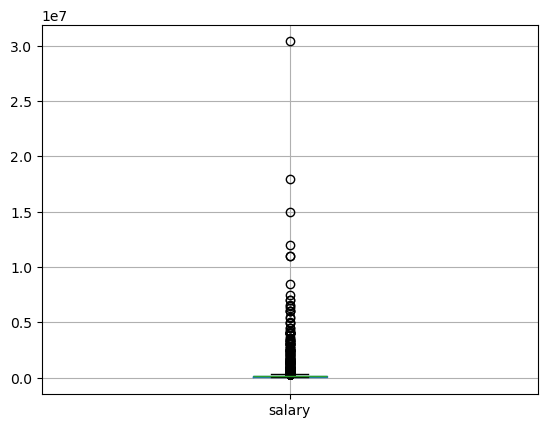

In [16]:
salaries_ds.boxplot(column='salary')
plt.show()

14. Utilisez la méthode de l’IQR pour identifier les outliers.

In [17]:
Q1 = salaries_ds['salary'].quantile(0.25)
Q3 = salaries_ds['salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = (salaries_ds['salary'] < (Q1 - 1.5 * IQR)) | (salaries_ds['salary'] > (Q3 + 1.5 * IQR))
print(salaries_ds[outliers])

       work_year experience_level employment_type  \
30        2025.0               EN              FT   
190       2025.0               SE              FT   
264       2025.0               SE              FT   
342       2025.0               SE              FT   
394       2025.0               SE              FT   
...          ...              ...             ...   
88559     2021.0               EN              FT   
88564     2021.0               MI              FT   
88576     2021.0               MI              FT   
88579     2020.0               SE              FT   
88583     2021.0               SE              FT   

                                job_title     salary salary_currency  \
30                     Research Scientist   358000.0             USD   
190                              Engineer   600593.0             USD   
264                              Engineer   431250.0             USD   
342                     Software Engineer   384200.0             USD   
394

15. Supprimez les valeurs aberrantes détectées.

In [18]:
salaries_ds = salaries_ds[~outliers]
print(salaries_ds.shape)

(43124, 11)


16. Convertissez une colonne date en type datetime et extrayez l’année, le mois et le jour.

In [19]:
# Le dataset ne contient pas de colonne date, mais je procéderai de cette manière si la colonne hire_date était présente
# salaries_ds['hire_date'] = pd.to_datetime(salaries_ds['hire_date'])
# salaries_ds['year'] = salaries_ds['hire_date'].dt.year
# salaries_ds['month'] = salaries_ds['hire_date'].dt.month
# salaries_ds['day'] = salaries_ds['hire_date'].dt.day
# print(salaries_ds.head())

17. Effectuez un one-hot encoding sur une colonne catégorielle.

In [20]:
print(categorical_cols)
salaries_ds = pd.get_dummies(salaries_ds, columns=categorical_cols)
print(salaries_ds.head())

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')
   work_year    salary  salary_in_usd  remote_ratio  experience_level_EN  \
0     2025.0   57000.0        60000.0          50.0                False   
1     2025.0  165000.0       165000.0           0.0                False   
2     2025.0  109000.0       109000.0           0.0                False   
3     2025.0  294000.0       294000.0           0.0                False   
4     2025.0  137600.0       137600.0           0.0                False   

   experience_level_EX  experience_level_MI  experience_level_SE  \
0                False                 True                False   
1                False                False                 True   
2                False                False                 True   
3                False                False                 True   
4                False               

18. Normalisez une colonne numérique entre 0 et 1.

In [21]:
scaler = MinMaxScaler()
salaries_ds['salary'] = scaler.fit_transform(salaries_ds[['salary']])
print(salaries_ds['salary'])

0        0.133706
1        0.469527
2        0.295398
3        0.870647
4        0.384328
           ...   
88577    0.031095
88578    0.469527
88580    0.425995
88581    0.282960
88582    0.267413
Name: salary, Length: 43124, dtype: float64


19. Créez une nouvelle colonne indiquant si une personne est majeure ou non (basé sur une

In [22]:
# Je vais utiliser la colonne experience_level_EN pour déterminer si une personne est majeure ou non, n'ayant pas d'information sur l'âge des personnes.
salaries_ds['is_adult'] = salaries_ds['experience_level_EN'] == False
print(salaries_ds['is_adult'].sample(10))

29687    True
87536    True
11714    True
5098     True
6950     True
7310     True
42789    True
17290    True
25855    True
29959    True
Name: is_adult, dtype: bool


20. Catégorisez une colonne continue en intervalles (ex : âge en jeunes/adultes/seniors).

In [23]:
salaries_ds['salary_in_usd_category'] = pd.cut(salaries_ds['salary_in_usd'], bins=3, labels=['low', 'medium', 'high'])
print(salaries_ds[['salary_in_usd_category', 'salary_in_usd']].sample(10))

      salary_in_usd_category  salary_in_usd
1490                     low       125000.0
15017                    low       116800.0
1780                  medium       160000.0
26708                 medium       172500.0
8693                  medium       262000.0
25960                 medium       220700.0
87209                 medium       172200.0
22786                    low       140000.0
11494                    low       123283.0
43022                    low        48000.0


21. Créez une variable binaire indiquant si une personne a un salaire supérieur à la médiane.

In [24]:
salaries_ds['salary_above_median'] = salaries_ds['salary'] > salaries_ds['salary'].median()
print(salaries_ds['salary_above_median'].sample(10))

86334     True
24787    False
41757     True
73278    False
24017     True
48120     True
5364      True
7918     False
3172     False
72525     True
Name: salary_above_median, dtype: bool
